## Calorimeter regression test
### Author: stephen.menary@manchester.ac.uk

---

### Step 1)  Grab a dataset of rings labelled by position

---

In [32]:
#  Create simulated dataset of rings and showers
#  -  datapoints are labelled by momentum

import Tools.shower_test_tools as tools

import numpy as np

num_pixels      = 51
num_simulations = 5000

TRAIN_X, TRAIN_Y, VAL_X, VAL_Y, TEST_X, TEST_Y = tools.get_rings_with_coordinates(do_x=True, do_y=True, do_p=False, num_pixels=num_pixels, num_simulations=num_simulations)

print(f"  TRAINING DATASET with size {len(TRAIN_X)}")
print(f"VALIDATION DATASET with size {len(VAL_X  )}")
print(f"      TEST DATASET with size {len(TEST_X )}")

'''
def proj_x (inp) :
    ret = []
    for i in range(len(inp)) :
        im = inp[i]
        new_im = np.zeros(shape=(im.shape[0],))
        for j in range(im.shape[0]) :
            new_im[j] = sum(im[j,:,0])
        ret.append(new_im)
    return np.array(ret)

TRAIN_X = proj_x(TRAIN_X)
VAL_X   = proj_x(VAL_X  )
TEST_X  = proj_x(TEST_X )
'''

5000 rings loaded successfully from file
  TRAINING DATASET with size 2500
VALIDATION DATASET with size 1250
      TEST DATASET with size 1250


'\ndef proj_x (inp) :\n    ret = []\n    for i in range(len(inp)) :\n        im = inp[i]\n        new_im = np.zeros(shape=(im.shape[0],))\n        for j in range(im.shape[0]) :\n            new_im[j] = sum(im[j,:,0])\n        ret.append(new_im)\n    return np.array(ret)\n\nTRAIN_X = proj_x(TRAIN_X)\nVAL_X   = proj_x(VAL_X  )\nTEST_X  = proj_x(TEST_X )\n'

---

### Step 2)  Plot some examples of our images

---

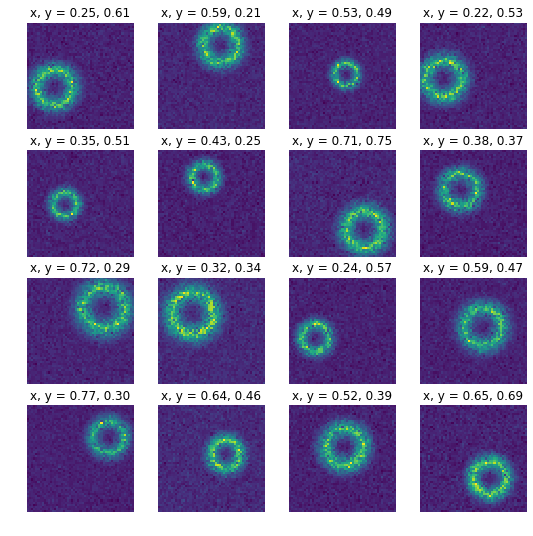

In [40]:
#  Plot some examples of datapoints
#

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
for idx, (im, label) in enumerate(zip(TRAIN_X[:16], TRAIN_Y[:16])) :
    plt.subplot(4, 4, 1+idx)
    plt.imshow(im[:,:,0])
    plt.axis('off')
    plt.title(f"x, y = {label[0]:.2f}, {label[1]:.2f}")
plt.show()


---

### Step 3)  Create a CNN regression network

---

In [41]:
#  Create regression network
#

from keras.layers import Dense, Flatten, Conv2D
from keras.models import Model, Sequential

def create_regression_network () :
    model = Sequential()
    model.add(Flatten(input_shape=(num_pixels, num_pixels, 1)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(2, activation="sigmoid"))
    model.compile(optimizer="adam", loss="mse")
    return model

model = create_regression_network()

---

### Step 4)  Train the network

---

In [42]:
#  Fit the training data
#  - using early stopping, and storing best solution
#

from keras.callbacks import EarlyStopping, ModelCheckpoint

model.fit(TRAIN_X, 
          TRAIN_Y, 
          validation_data=(VAL_X, VAL_Y), 
          epochs=10000, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                     ModelCheckpoint('.model3.hdf5', save_best_only=True, monitor='val_loss')])

Train on 2500 samples, validate on 1250 samples
Epoch 1/10000
2500/2500 [==============================] - 1s 211us/step - loss: 0.2819 - val_loss: 0.2847
Epoch 2/10000
2500/2500 [==============================] - 0s 101us/step - loss: 0.2821 - val_loss: 0.2847
Epoch 3/10000
2500/2500 [==============================] - 0s 110us/step - loss: 0.2821 - val_loss: 0.2847
Epoch 4/10000
2500/2500 [==============================] - 0s 107us/step - loss: 0.2821 - val_loss: 0.2847
Epoch 5/10000
2500/2500 [==============================] - 0s 112us/step - loss: 0.2821 - val_loss: 0.2847
Epoch 6/10000
2500/2500 [==============================] - 0s 108us/step - loss: 0.2821 - val_loss: 0.2847


---

### Step 5)  Make predictions using the test data

---

In [36]:
#  Make predictions on test dataset
#

test_predictions = model.predict(TEST_X)

---

### Step 6) Plot correlation between true and predicted momenta

---

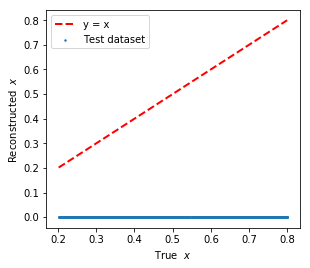

In [37]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(121)
plt.scatter(TEST_Y[:,0], test_predictions[:,0], s=2, label="Test dataset")
x_min, x_max = min(TEST_Y[:,0]), max(TEST_Y[:,0])
plt.plot(np.linspace(x_min, x_max, 2), np.linspace(x_min, x_max, 2), "--", c="r", linewidth=2, label="y = x")
plt.xlabel("True  $x$")
plt.ylabel("Reconstructed  $x$")
plt.legend(loc="upper left")
'''
fig.add_subplot(122)
plt.scatter(TEST_Y[:,1], test_predictions[:,1], s=2, label="Test dataset")
x_min, x_max = min(TEST_Y[:,0]), max(TEST_Y[:,0])
plt.plot(np.linspace(x_min, x_max, 2), np.linspace(x_min, x_max, 2), "--", c="r", linewidth=2, label="y = x")
plt.xlabel("True  $y$")
plt.ylabel("Reconstructed  $y$")
plt.legend(loc="upper left")
'''
plt.show()

---

### Step 7)  Plot some datapoints along with real and predicted momenta

---

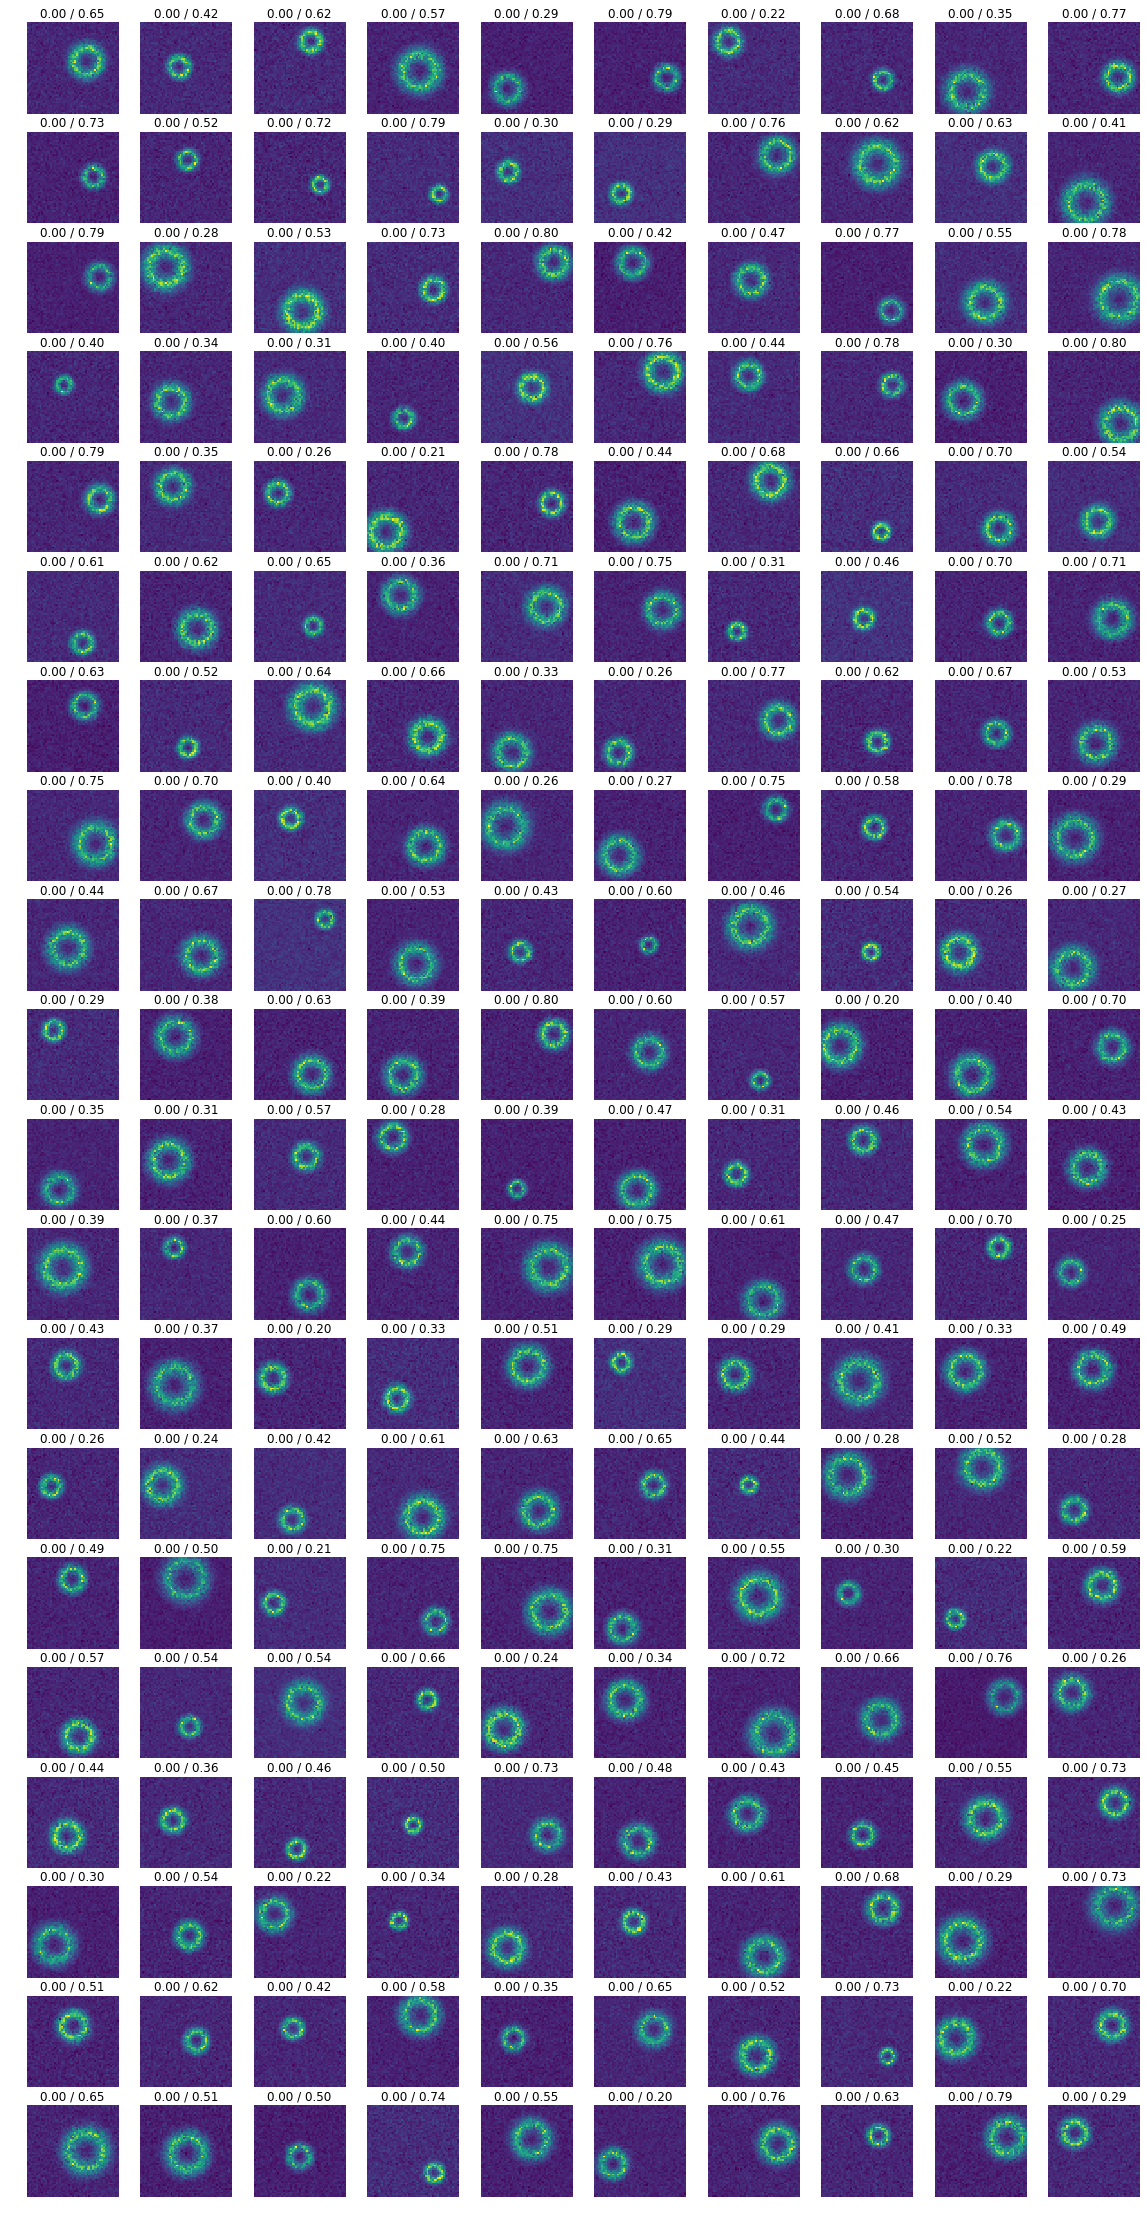

In [39]:
#  Plot some of the predictions
#

fig = plt.figure(figsize=(20,40))
for idx, (im, label, pred) in enumerate(zip(TEST_X[:200], TEST_Y[:200], test_predictions[:200])) :
    z = im[:,:,0]
    plt.subplot(20, 10, 1+idx)
    plt.imshow(z)
    plt.axis('off')
    plt.title(f"{pred[0]:.2f} / {label[0]:.2f}")
    #plt.title(f"{pred[0]:.2f}, {pred[1]:.2f}, {100.*pred[2]:.0f}\n{label[0]:.2f}, {label[1]:.2f}, {100.*label[2]:.0f}")
plt.show()